PAZIENTE SANO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 27.3 MB/s eta 0:00:00
Downloaded fMRI file: imb-zip.nii


[_add_readme_to_default_data_locations] Added README.md to /root/nilearn_data

[get_dataset_dir] Dataset created in /root/nilearn_data/aal_SPM12

[fetch_single_file] Downloading data from https://www.gin.cnrs.fr/AAL_files/aal_for_SPM12.tar.gz ...

[fetch_single_file]  ...done. (3 seconds, 0 min)

[uncompress_file] Extracting data from 
/root/nilearn_data/aal_SPM12/5d72fe1c9daf02b658cbf1f7e7026e0f/aal_for_SPM12.tar.gz...

[uncompress_file] .. done.

Adjacency matrix saved as 'adjacency_matrix_cn.csv'
Legenda:
0: Precentral_L
1: Precentral_R
2: Frontal_Sup_L
3: Frontal_Sup_R
4: Frontal_Sup_Orb_L
5: Frontal_Sup_Orb_R
6: Frontal_Mid_L
7: Frontal_Mid_R
8: Frontal_Mid_Orb_L
9: Frontal_Mid_Orb_R
10: Frontal_Inf_Oper_L
11: Frontal_Inf_Oper_R
12: Frontal_Inf_Tri_L
13: Frontal_Inf_Tri_R
14: Frontal_Inf_Orb_L
15: Frontal_Inf_Orb_R
16: Rolandic_Oper_L
17: Rolandic_Oper_R
18: Supp_Motor_Area_L
19: Supp_Motor_Area_R
20: Olfactory_L
21: Olfactory_R
22: Frontal_Sup_Medial_L
23: Frontal_Sup_Medial_R
24: Frontal_Med_Orb_L
25: Frontal_Med_Orb_R
26: Rectus_L
27: Rectus_R
28: Insula_L
29: Insula_R
30: Cingulum_Ant_L
31: Cingulum_Ant_R
32: Cingulum_Mid_L
33: Cingulum_Mid_R
34: Cingulum_Post_L
35: Cingulum_Post_R
36: Hippocampus_L
37: Hippocampus_R
38: ParaHippocampal_L
39: ParaHippocampal_R
40: Amygdala_L
41: Amygdala_R
42: Calcarine_L
43: Calcarine_R
44: Cuneus_L
45: Cuneus_R
46: Lingual_L
47: Lingual_R
48: Occipital_Sup_L
49: Occipital_Sup_R
50: Occ

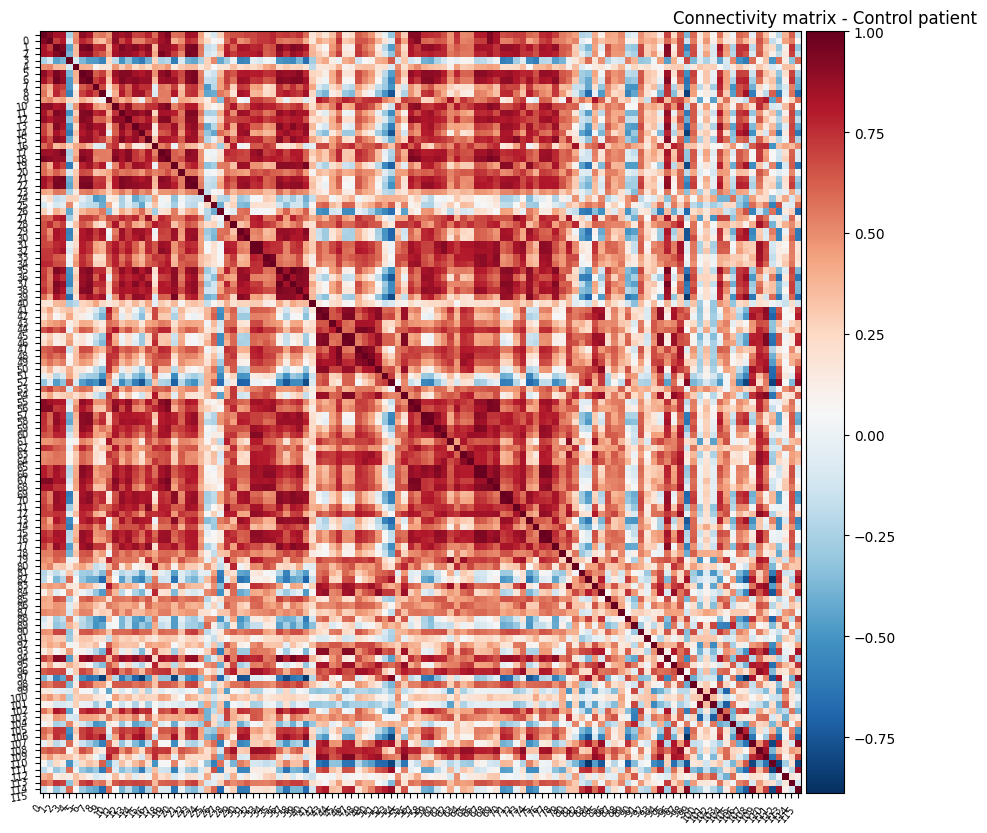

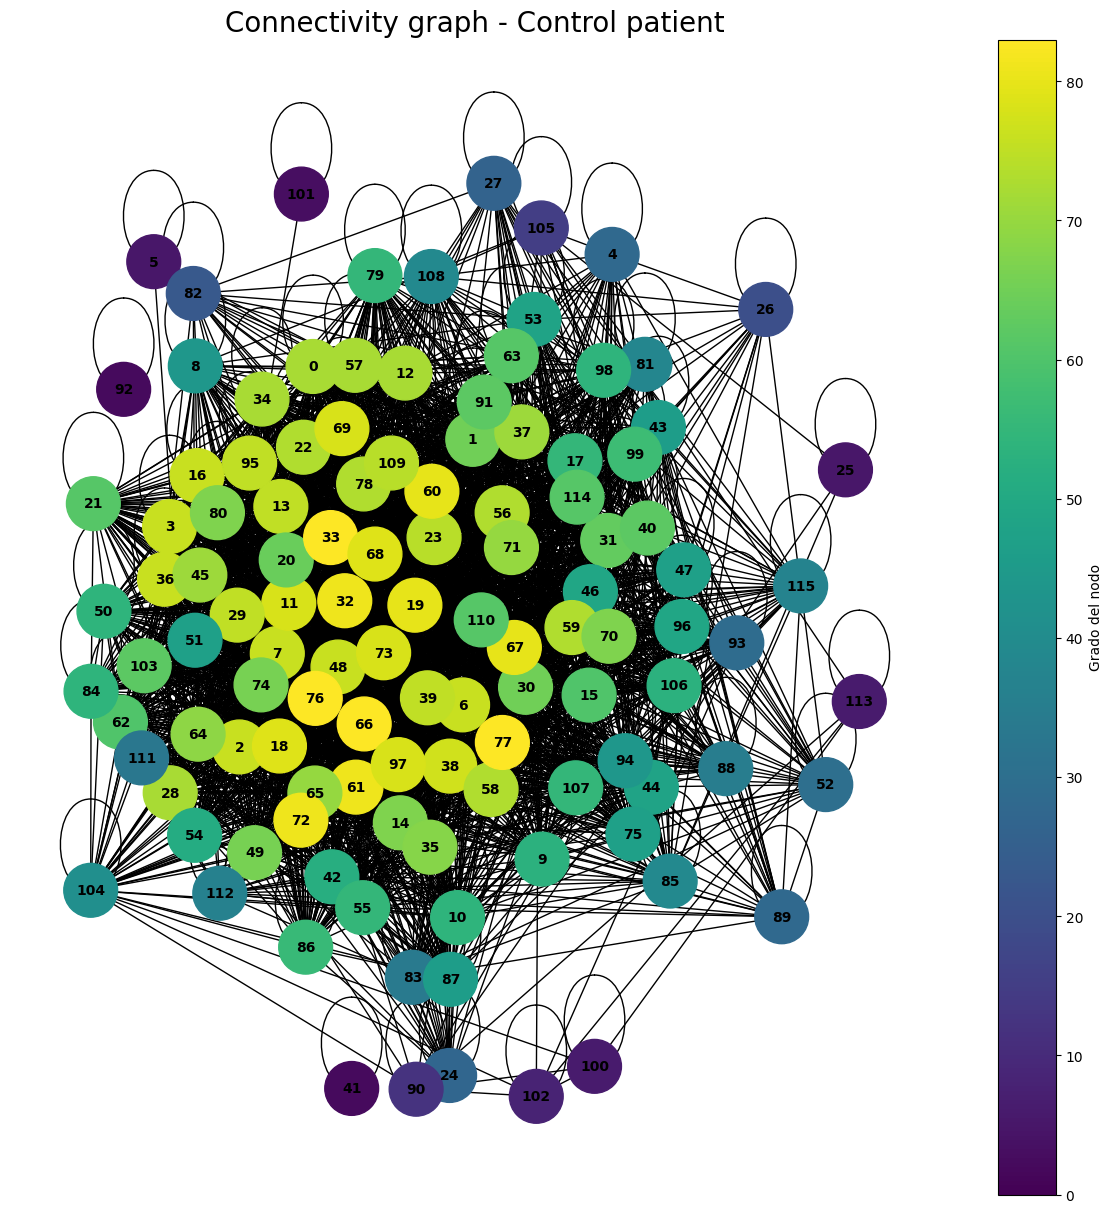

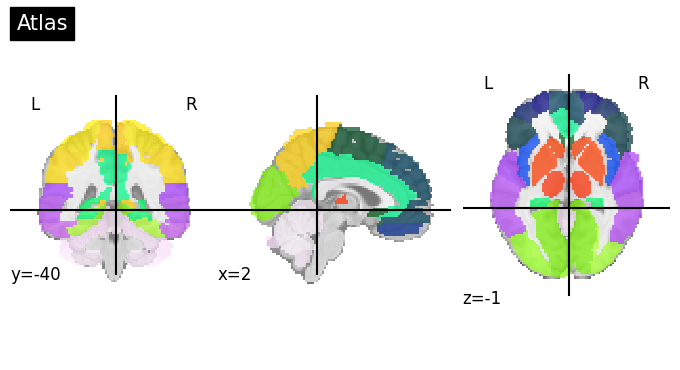

In [ ]:
# Install necessary libraries
!pip install nilearn networkx

# Import necessary libraries
import os
import numpy as np
import networkx as nx
from nilearn import datasets, image, input_data, plotting
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from nilearn import plotting
import matplotlib.cm as cm

# Step 1: Download the NIfTI file from GitHub
# Updated URL to point to the raw file on GitHub
nifti_url = "https://github.com/lipantar8/experimentacion/raw/d750a5e5a2c6becc9b6150fe808900288bfc1677/imb-zip.nii"
fmri_path = "imb-zip.nii"

response = requests.get(nifti_url)
with open(fmri_path, "wb") as file:
    file.write(response.content)

print(f"Downloaded fMRI file: {fmri_path}")

# Step 2: Load the AAL atlas for functional connectivity
atlas = datasets.fetch_atlas_aal()
atlas_filename = atlas.maps
labels = atlas.labels

# Step 3: Extract time series from the fMRI data
masker = input_data.NiftiLabelsMasker(labels_img=atlas_filename, standardize=True)
time_series = masker.fit_transform(fmri_path)

# Step 4: Compute the connectivity matrix
connectivity_matrix = np.corrcoef(time_series.T)

# Step 5: Create a graph and compute adjacency matrix
threshold = 0.5  # Define a threshold for graph creation
adjacency_matrix = (np.abs(connectivity_matrix) > threshold).astype(int)

# Use from_numpy_array instead of from_numpy_matrix
graph = nx.from_numpy_array(adjacency_matrix)

# Step 6: Save and display results
np.savetxt("adjacency_matrix_cn.csv", adjacency_matrix, delimiter=",")
print("Adjacency matrix saved as 'adjacency_matrix_cn.csv'")

# Optional: Visualize the graph
# 1. Visualizzazione della matrice con numeri e ID
plotting.plot_matrix(connectivity_matrix, figure=(10, 8), labels=range(len(labels)), colorbar=True)
plt.title("Connectivity matrix - Control patient")

# Creazione di un dizionario per associare numeri a ID
id_mapping = {i: label for i, label in enumerate(labels)}

# Stampa del dizionario per la legenda
print("Legenda:")
for i, label in id_mapping.items():
    print(f"{i}: {label}")

# Crea una lista di colori per i nodi basata sul loro grado usando una scala di colori continua
node_degrees = dict(graph.degree())
max_degree = max(node_degrees.values())  # Trova il grado massimo
node_color_map = [cm.viridis(degree / max_degree) for degree in node_degrees.values()]  # Usa la scala di colori 'viridis'

# Visualizzazione del grafo migliorata
# Zoom del grafo
fig, ax = plt.subplots(figsize=(15, 15))  # Create a figure and an Axes object
pos = nx.spring_layout(graph, seed=42, k=2)  # Regola il parametro 'k' per aumentare la distanza tra i nodi

nx.draw(graph, pos=pos, with_labels=True, node_color=node_color_map, node_size=1500, font_size=10, font_weight='bold', ax=ax) # Draw the graph on the Axes object

plt.title("Connectivity graph - Control patient", fontsize=20)

# Crea una colorbar per mostrare la scala di colori
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=0, vmax=max_degree))
sm.set_array([])  # Necessario per evitare un warning
cbar = fig.colorbar(sm, ax=ax) # Associate the colorbar with the Axes object
cbar.set_label('Grado del nodo')

plt.show()

# Visualize the custom atlas
plotting.plot_roi(atlas_filename, title="Atlas")
plt.show()

PAZIENTE MALATO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 15.6 MB/s eta 0:00:00
Downloaded fMRI file: paziente-ad.nii


[_add_readme_to_default_data_locations] Added README.md to /root/nilearn_data

[get_dataset_dir] Dataset created in /root/nilearn_data/aal_SPM12

[fetch_single_file] Downloading data from https://www.gin.cnrs.fr/AAL_files/aal_for_SPM12.tar.gz ...

[_chunk_report_] Downloaded 303104 of 351343 bytes (86.3%%,    0.2s remaining)

[fetch_single_file]  ...done. (4 seconds, 0 min)

[uncompress_file] Extracting data from 
/root/nilearn_data/aal_SPM12/5d72fe1c9daf02b658cbf1f7e7026e0f/aal_for_SPM12.tar.gz...

[uncompress_file] .. done.

Adjacency matrix saved as 'adjacency_matrix_ad.csv'
Legenda:
0: Precentral_L
1: Precentral_R
2: Frontal_Sup_L
3: Frontal_Sup_R
4: Frontal_Sup_Orb_L
5: Frontal_Sup_Orb_R
6: Frontal_Mid_L
7: Frontal_Mid_R
8: Frontal_Mid_Orb_L
9: Frontal_Mid_Orb_R
10: Frontal_Inf_Oper_L
11: Frontal_Inf_Oper_R
12: Frontal_Inf_Tri_L
13: Frontal_Inf_Tri_R
14: Frontal_Inf_Orb_L
15: Frontal_Inf_Orb_R
16: Rolandic_Oper_L
17: Rolandic_Oper_R
18: Supp_Motor_Area_L
19: Supp_Motor_Area_R
20: Olfactory_L
21: Olfactory_R
22: Frontal_Sup_Medial_L
23: Frontal_Sup_Medial_R
24: Frontal_Med_Orb_L
25: Frontal_Med_Orb_R
26: Rectus_L
27: Rectus_R
28: Insula_L
29: Insula_R
30: Cingulum_Ant_L
31: Cingulum_Ant_R
32: Cingulum_Mid_L
33: Cingulum_Mid_R
34: Cingulum_Post_L
35: Cingulum_Post_R
36: Hippocampus_L
37: Hippocampus_R
38: ParaHippocampal_L
39: ParaHippocampal_R
40: Amygdala_L
41: Amygdala_R
42: Calcarine_L
43: Calcarine_R
44: Cuneus_L
45: Cuneus_R
46: Lingual_L
47: Lingual_R
48: Occipital_Sup_L
49: Occipital_Sup_R
50: Occ

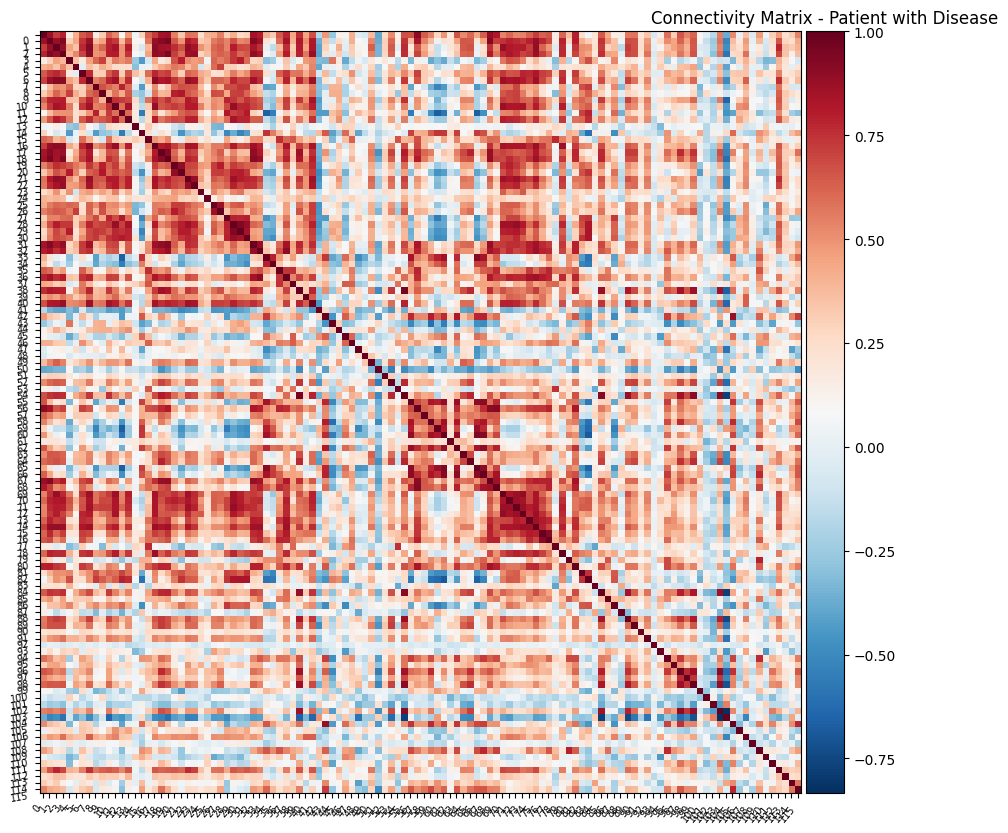

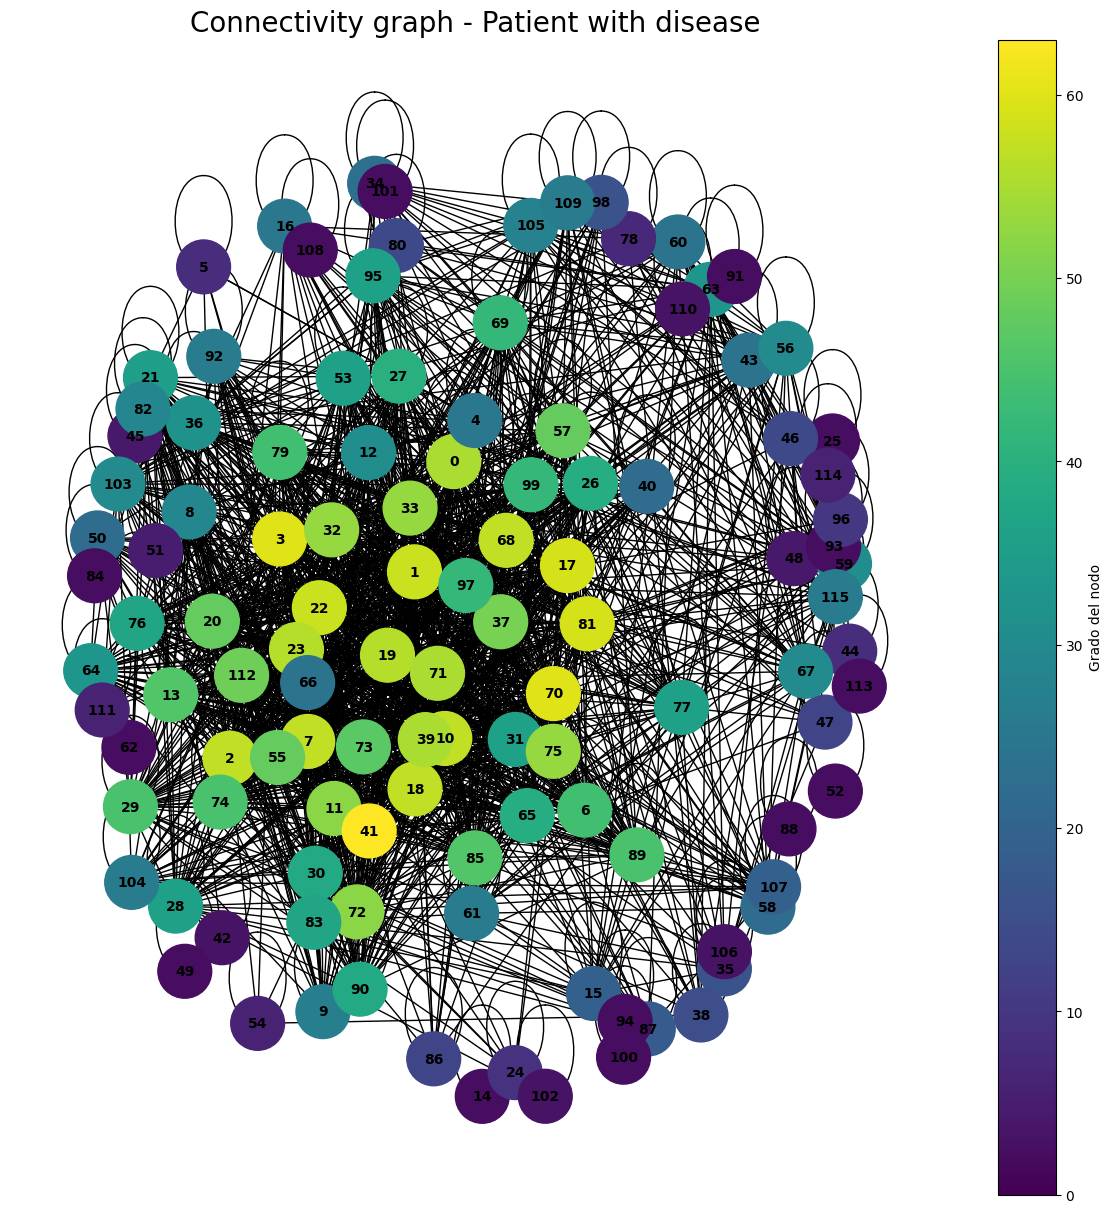

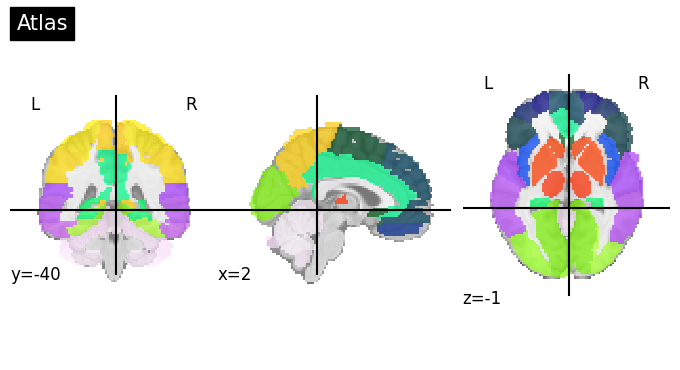

In [ ]:
# Install necessary libraries
!pip install nilearn networkx

# Import necessary libraries
import os
import numpy as np
import networkx as nx
from nilearn import datasets, image, input_data, plotting
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from nilearn import plotting
import matplotlib.cm as cm

# Step 1: Download the NIfTI file from GitHub
# Updated URL to point to the raw file on GitHub
nifti_url = "https://github.com/lipantar8/experimentacion/raw/29fe7b9a87133cc9c8f5c65001cb4e04f481d165/paziente-ad.nii"
fmri_path_ad = "paziente-ad.nii"

response = requests.get(nifti_url)
with open(fmri_path_ad, "wb") as file:
    file.write(response.content)

print(f"Downloaded fMRI file: {fmri_path_ad}")

# Step 2: Load the AAL atlas for functional connectivity
atlas = datasets.fetch_atlas_aal()
atlas_filename = atlas.maps
labels = atlas.labels

# Step 3: Extract time series from the fMRI data
masker = input_data.NiftiLabelsMasker(labels_img=atlas_filename, standardize=True)
time_series = masker.fit_transform(fmri_path_ad)

# Step 4: Compute the connectivity matrix
connectivity_matrix = np.corrcoef(time_series.T)

# Step 5: Create a graph and compute adjacency matrix
threshold = 0.5  # Define a threshold for graph creation
adjacency_matrix = (np.abs(connectivity_matrix) > threshold).astype(int)

# Use from_numpy_array instead of from_numpy_matrix
graph = nx.from_numpy_array(adjacency_matrix)

# Step 6: Save and display results
np.savetxt("adjacency_matrix_ad.csv", adjacency_matrix, delimiter=",")
print("Adjacency matrix saved as 'adjacency_matrix_ad.csv'")

# Optional: Visualize the graph
# 1. Visualizzazione della matrice con numeri e ID
plotting.plot_matrix(connectivity_matrix, figure=(10, 8), labels=range(len(labels)), colorbar=True)
plt.title("Connectivity Matrix - Patient with Disease")

# Creazione di un dizionario per associare numeri a ID
id_mapping = {i: label for i, label in enumerate(labels)}

# Stampa del dizionario per la legenda
print("Legenda:")
for i, label in id_mapping.items():
    print(f"{i}: {label}")

# Crea una lista di colori per i nodi basata sul loro grado usando una scala di colori continua
node_degrees = dict(graph.degree())
max_degree = max(node_degrees.values())  # Trova il grado massimo
node_color_map = [cm.viridis(degree / max_degree) for degree in node_degrees.values()]  # Usa la scala di colori 'viridis'

# Visualizzazione del grafo migliorata
# Zoom del grafo
fig, ax = plt.subplots(figsize=(15, 15))  # Create a figure and an Axes object
pos = nx.spring_layout(graph, seed=42, k=2)  # Regola il parametro 'k' per aumentare la distanza tra i nodi

nx.draw(graph, pos=pos, with_labels=True, node_color=node_color_map, node_size=1500, font_size=10, font_weight='bold', ax=ax) # Draw the graph on the Axes object

plt.title("Connectivity graph - Patient with disease", fontsize=20)

# Crea una colorbar per mostrare la scala di colori
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=0, vmax=max_degree))
sm.set_array([])  # Necessario per evitare un warning
cbar = fig.colorbar(sm, ax=ax) # Associate the colorbar with the Axes object
cbar.set_label('Grado del nodo')

plt.show()

# Visualize the custom atlas
plotting.plot_roi(atlas_filename, title="Atlas")
plt.show()